# PA 3: Association Analysis - Apriori/FP Growth

## Student Details 

**Student Name and ID:**

**Group members name and ID :-**

## Submission Instructions

Rename this submission file as specified in the instructions document

## Tasks

1.    Load the dataset (from the csv file)

In [1]:
# Write your code here
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
import matplotlib.pyplot as plt
import time
import random

2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [2]:
# Write your code here
df=pd.read_csv('dataset1.csv')
df.drop("Tid",axis=1,inplace=True)
df.isnull().sum()

items    0
dtype: int64

In [3]:
df['items'] = df['items'].str.split(',').apply(lambda x: [i.strip() for i in x])


3.    Encode the dataset

In [4]:
lists=list(df['items'])
te = TransactionEncoder()
te_ary = te.fit(lists).transform(lists)
df_new = pd.DataFrame(te_ary, columns=te.columns_)
df_new

,,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,True,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,True,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,True,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

In [40]:
# Making hyperparameters
min_supports=[]
min_confidences=[]
hyperparameters_for_fpgrowth=[]
hyperparameters_for_apriori=[]
for i in range(3):
    a=random.uniform(0, 1)
    b=random.uniform(0, 1)
    
    min_supports.append(a)
    min_confidences.append(b)
for min_support,min_confidence in zip(min_supports,min_confidences):
    hyperparameters_for_apriori.append((min_support,min_confidence))
    hyperparameters_for_fpgrowth.append((min_support,min_confidence))


print(hyperparameters_for_apriori)
print(hyperparameters_for_fpgrowth)

[(0.38272731771053525, 0.9405708910611579), (0.6001986450585872, 0.10739113205461537), (0.16687291098988144, 0.5844530696396316)]
[(0.38272731771053525, 0.9405708910611579), (0.6001986450585872, 0.10739113205461537), (0.16687291098988144, 0.5844530696396316)]


In [41]:
# For making both same
hyperparameters_for_apriori=hyperparameters_for_fpgrowth

4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [42]:
def apriori_solver(df_new,hyperparameter_for_apriori):
    apriori_times = []
    apriori_num_itemsets = []
    my_association_rules=[]
    top_5_rules=[]
    maximal_sets=[]
    closed_sets=[]
    i=0
    for min_support,min_confidence in hyperparameter_for_apriori:
        # Run Apriori algorithm and measure time taken
        start_time = time.time()
        frequent_itemsets_apriori = frequent_itemsets = apriori(df_new, min_support=min_support, use_colnames=True)
        apriori_times.append(time.time() - start_time)
        apriori_num_itemsets.append(len(frequent_itemsets_apriori))
        
        
        rules=association_rules(pd.DataFrame(frequent_itemsets), metric='confidence',min_threshold=min_confidence)
        
        my_association_rules.append(len(pd.DataFrame(rules)))
        print(f"Number of Association rules in {i+1} iteration is ",len(rules))
        top5_rules = rules.sort_values(by='confidence', ascending=False).head(5)
        top_5_rules.append(top5_rules)
        num_maximal_sets = 0
        for itemset in frequent_itemsets['itemsets']:
            is_maximal = True
            for other_itemset in frequent_itemsets['itemsets']:
                if itemset.issubset(other_itemset) and itemset != other_itemset:
                    is_maximal = False
                    break
            if is_maximal:
                num_maximal_sets += 1
        maximal_sets.append(num_maximal_sets)

        num_closed_sets = 0
        for itemset in frequent_itemsets['itemsets']:
            is_closed = True
            for other_itemset in frequent_itemsets['itemsets']:
                if itemset != other_itemset and itemset.issubset(other_itemset):
                    is_closed = False
                    break
            if is_closed:
                num_closed_sets += 1
        closed_sets.append(num_closed_sets)
        i+=1
    return apriori_times,apriori_num_itemsets,my_association_rules,top_5_rules,maximal_sets,closed_sets
    
print("3 different combinations of min_support and min_confidence is (first:min_spoort,second:min_confidence)",hyperparameters_for_apriori)

apriori_times,apriori_num_itemsets,my_association_rules,top_5_rules,maximal_sets,closed_sets= apriori_solver(df_new,hyperparameters_for_apriori)  

print("Number of itemsets are ",apriori_num_itemsets)
print("Top 5 rules are given by top_5_rules where each index has dataframe")
print("Maximal Sets ",maximal_sets)
print("Closed Sets ",closed_sets)


3 different combinations of min_support and min_confidence is (first:min_spoort,second:min_confidence) [(0.38272731771053525, 0.9405708910611579), (0.6001986450585872, 0.10739113205461537), (0.16687291098988144, 0.5844530696396316)]
Number of Association rules in 1 iteration is  16
Number of Association rules in 2 iteration is  0
Number of Association rules in 3 iteration is  127
Number of itemsets are  [33, 1, 255]
Top 5 rules are given by top_5_rules where each index has dataframe
Maximal Sets  [16, 1, 111]
Closed Sets  [16, 1, 111]


In [47]:
top_5_rules[0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple),(),0.383383,1.0,0.383383,1.0,1.0,0.0,inf
1,(Bread),(),0.384384,1.0,0.384384,1.0,1.0,0.0,inf
2,(Butter),(),0.420420,1.0,0.420420,1.0,1.0,0.0,inf
3,(Cheese),(),0.404404,1.0,0.404404,1.0,1.0,0.0,inf
4,(Corn),(),0.407407,1.0,0.407407,1.0,1.0,0.0,inf


5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [48]:
def fp_growth_solver(df_new,hyperparameter_for_fpgrowth):
    fpgrowth_times = []
    fpgrowth_num_itemsets = []
    my_association_rules=[]
    top_5_rules=[]
    maximal_sets=[]
    closed_sets=[]

    for min_support,min_confidence in hyperparameter_for_fpgrowth:
        # Run Apriori algorithm and measure time taken
        start_time = time.time()
        frequent_itemsets_fp_growth = fpgrowth(df_new, min_support=min_support, use_colnames=True)
        fpgrowth_times.append(time.time() - start_time)
        fpgrowth_num_itemsets.append(len(frequent_itemsets_fp_growth))


        rules = association_rules(frequent_itemsets_fp_growth, metric='confidence')
        total_association_rules = len(rules)
        print()
        my_association_rules.append(total_association_rules)
        print(f"Number of Association rules in {i+1} iteration is ",len(rules))
        
        top5_rules =rules.sort_values(by='confidence', ascending=False).head(5)
        top_5_rules.append(top5_rules)
        
        
        num_maximal_sets = frequent_itemsets_fp_growth['itemsets'].apply(lambda x: len(x)).sum()
        maximal_sets.append(num_maximal_sets)

        num_closed_sets = frequent_itemsets_fp_growth['support'].apply(lambda x: x == 1.0).sum()
        closed_sets.append(num_closed_sets)
        
    return fpgrowth_times,fpgrowth_num_itemsets,my_association_rules,top_5_rules,maximal_sets,closed_sets
    

print("3 different combinations of min_support and min_confidence is (first:min_spoort,second:min_confidence)",hyperparameters_for_fpgrowth)

fpgrowth_times,fpgrowth_num_itemsets,my_association_rules,top_5_rules,maximal_sets,closed_sets= fp_growth_solver(df_new,hyperparameters_for_fpgrowth)  


# print(association_rules)


# fpgrowth_times,fpgrowth_num_itemsets,my_association_rules,top_5_rules,maximal_sets,closed_sets= fp_growth_solver(df_new,hyperparameters_for_fpgrowth)  

print()
    


print("Number of itemsets are ",fpgrowth_num_itemsets)
print("Top 5 rules are given by top_5_rules where each index has dataframe")
print("Maximal Sets ",maximal_sets)
print("Closed Sets ",closed_sets)


3 different combinations of min_support and min_confidence is (first:min_spoort,second:min_confidence) [(0.38272731771053525, 0.9405708910611579), (0.6001986450585872, 0.10739113205461537), (0.16687291098988144, 0.5844530696396316)]

Number of Association rules in 3 iteration is  16

Number of Association rules in 3 iteration is  0

Number of Association rules in 3 iteration is  127

Number of itemsets are  [33, 1, 255]
Top 5 rules are given by top_5_rules where each index has dataframe
Maximal Sets  [49, 1, 604]
Closed Sets  [1, 1, 1]


In [51]:
top_5_rules[2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(),0.421421,1.0,0.421421,1.0,1.0,0.0,inf
80,"(Onion, Ice cream)",(),0.192192,1.0,0.192192,1.0,1.0,0.0,inf
93,"(chocolate, Nutmeg)",(),0.186186,1.0,0.186186,1.0,1.0,0.0,inf
92,"(Ice cream, Nutmeg)",(),0.187187,1.0,0.187187,1.0,1.0,0.0,inf
91,"(Yogurt, Nutmeg)",(),0.192192,1.0,0.192192,1.0,1.0,0.0,inf


6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

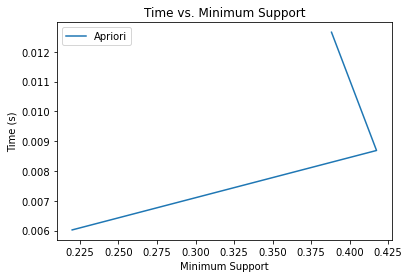

------------------------------------------------------------------------------------------------------------------------


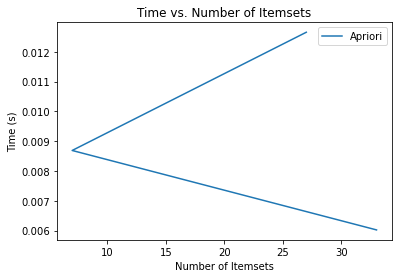

In [16]:
# For Apriori
min_supports=[a for a,b in hyperparameters_for_apriori]   
plt.plot(min_supports, apriori_times, label='Apriori')
plt.xlabel('Minimum Support')
plt.ylabel('Time (s)')
plt.title('Time vs. Minimum Support')
plt.legend()
plt.show()


print("------------------------------------------------------------------------------------------------------------------------")

plt.plot(apriori_num_itemsets,apriori_times, label='Apriori')
plt.xlabel('Number of Itemsets')
plt.ylabel('Time (s)')
plt.title('Time vs. Number of Itemsets')
plt.legend()
plt.show()


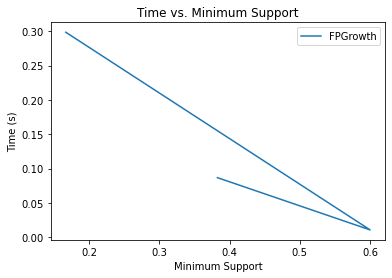

------------------------------------------------------------------------------------------------------------------------


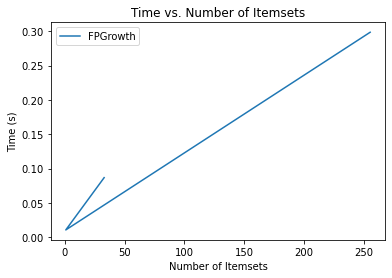

In [53]:
# For FP-Growth

min_supports=[a for a,b in hyperparameters_for_fpgrowth]   
# Plot time vs. minimum support
plt.plot(min_supports, fpgrowth_times, label='FPGrowth')
plt.xlabel('Minimum Support')
plt.ylabel('Time (s)')
plt.title('Time vs. Minimum Support')
plt.legend()
plt.show()

print("------------------------------------------------------------------------------------------------------------------------")

plt.plot(fpgrowth_num_itemsets,fpgrowth_times, label='FPGrowth')
plt.xlabel('Number of Itemsets')
plt.ylabel('Time (s)')
plt.title('Time vs. Number of Itemsets')
plt.legend()
plt.show()


7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

Apriori Algorithm: The Apriori algorithm is a classic algorithm for mining frequent itemsets. It works by generating candidate itemsets of increasing length, and then pruning those that do not meet a minimum support threshold. The algorithm requires multiple passes over the dataset and may suffer from performance issues with large datasets due to its expensive candidate generation step. However, it has the advantage of being easy to understand and implement.

FP-Growth Algorithm: The FP-Growth algorithm is a more recent and efficient algorithm for mining frequent itemsets. It uses a tree-based data structure called the FP-Tree to represent the dataset, which allows for efficient generation of frequent itemsets without the need for candidate generation and pruning. This makes it faster than Apriori, especially for large datasets, as it requires only two passes over the dataset. However, the FP-Growth algorithm may have a higher memory overhead due to the need to construct the FP-Tree.

In our case FP-Growth has given good performance since the number of maximal sets are high.

One more important factor is top 5 rules since in FP-Growth the antecedents have high lengths.

# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7